In [2]:
import csv
import numpy as np
import pandas as pd
import math
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

Train Accuracy: 0.7230063965884861
Test Accuracy: 0.72
- Confusion Matrix:


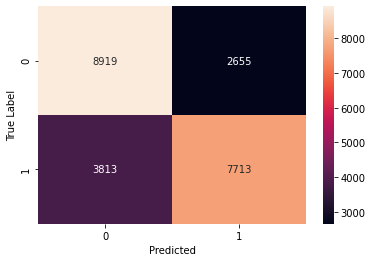

- Report:
              precision    recall  f1-score   support

           0       0.70      0.77      0.73     11574
           1       0.74      0.67      0.70     11526

    accuracy                           0.72     23100
   macro avg       0.72      0.72      0.72     23100
weighted avg       0.72      0.72      0.72     23100



In [41]:
#Logistic Regression - Supervised 

rawData = [] #Hold all dataset raw in memory
processedData = []
#Load the dataset into the program and store it into a list
def loadData(path):
    with open(path) as f:
        reader = csv.reader(f)
        for line in reader:
            rawData.append(line)

loadData("cardio_train.csv")
#print(rawData[0][0])
#print(rawData[1])

headers = preProcess(rawData)

#print(headers)
#print(processedData[1])
#Feature vector
features = [entry[:11]for entry in processedData]
#print(features[1])
#Labels for the entries
labels = [entry[11]for entry in processedData]
#print(labels[1])
#Feature + Label is the x-y pair needed for the model in order to start training
#The label is the risk factor 0 (No risk) or 1 (At risk)

#For the purpose of validation, ensuring that the model works well, the dataset will be split into training and testing (held out)
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.33, random_state=0)

# Uncomment this if you want to use standardized features with a deviation = 1 From my testing this performs similar or worse
#scaler = StandardScaler()
#features_train = scaler.fit_transform(features_train)
#features_test = scaler.fit_transform(features_test)

LRClassifier = LogisticRegression(solver='liblinear', penalty = 'l2',C=1, random_state=0)
LRClassifier.fit(features_train, labels_train)

labels_pred = LRClassifier.predict(features_test)
print('Train Accuracy: '+ str(LRClassifier.score(features_train, labels_train)))
print('Test Accuracy: ' + str(LRClassifier.score(features_test, labels_test)))
print('- Confusion Matrix:')
matrix = confusion_matrix(labels_test, labels_pred)
sns.heatmap(matrix, annot = True, fmt = 'g')
plt.xlabel("Predicted")
plt.ylabel("True Label") 
plt.show()
print('- Report:')
print(classification_report(labels_test, labels_pred))

The AUC is: 0.7198946246082628


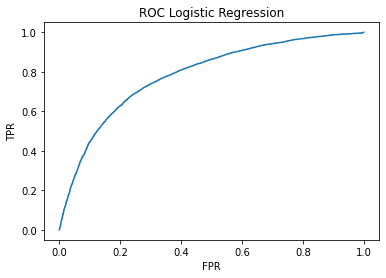

In [126]:
#ROC Metrics!
ROC_AUC = roc_auc_score(labels_test,LRClassifier.predict(features_test))
print('The AUC is: ' + str(ROC_AUC))
fpr, tpr, thresholds = roc_curve(labels_test,LRClassifier.predict_proba(features_test)[:,1])
plt.figure()
plt.plot(fpr,tpr,label = 'ROC Graph')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Logistic Regression')
plt.show()

In [4]:
#Process the raw data, convert from days to years, separate header, add/remove features should be done from here
def preProcess(rawData):
    headers = rawData[0][0].split(";")[1:]
    
    for i in range(1, len(rawData)):
        line = rawData[i][0].split(";")
        processedData.append(line[1:])
        for j in range(1,len(processedData[i-1])):
            processedData[i-1][j] = math.trunc(float(processedData[i-1][j]))

    for i in range(len(processedData)):
        years = float(processedData[i][0]) / 365
        processedData[i][0] = math.trunc(years)
        
    return headers

Train Accuracy: 0.7221535181236673
Test Accuracy: 0.7193073593073593
- Confusion Matrix:


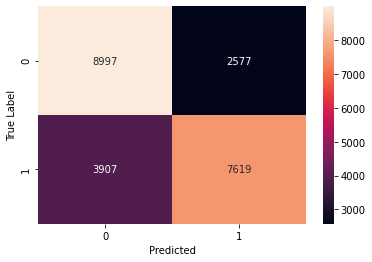

- Report:
              precision    recall  f1-score   support

           0       0.70      0.78      0.74     11574
           1       0.75      0.66      0.70     11526

    accuracy                           0.72     23100
   macro avg       0.72      0.72      0.72     23100
weighted avg       0.72      0.72      0.72     23100



In [55]:
##Best subset run !

#print(headers)

#Header bit jsut to check indexes to be deleted!
headers2 = np.array(headers)
headers2 = np.delete(headers2,[1,2,3,7,8,9],None)

#This generates the best subset
bestfeatures = np.array(features)
bestfeatures = np.delete(bestfeatures,[1,2,3,7,8,9],1)
#print(headers2)
#print(features2)

features_train, features_test, labels_train, labels_test = train_test_split(bestfeatures, labels, test_size=0.33, random_state=0)
LRClassifier = LogisticRegression(solver='liblinear', penalty = 'l2',C=1, random_state=0)
LRClassifier.fit(features_train, labels_train)

labels_pred = LRClassifier.predict(features_test)
print('Train Accuracy: '+ str(LRClassifier.score(features_train, labels_train)))
print('Test Accuracy: ' + str(LRClassifier.score(features_test, labels_test)))
print('- Confusion Matrix:')
matrix = confusion_matrix(labels_test, labels_pred)
sns.heatmap(matrix, annot = True, fmt = 'g')
plt.xlabel("Predicted")
plt.ylabel("True Label") 
plt.show()
print('- Report:')
print(classification_report(labels_test, labels_pred))

       age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0       50       2     168    62.0    110     80            1     1      0   
1       55       1     156    85.0    140     90            3     1      0   
2       51       1     165    64.0    130     70            3     1      0   
3       48       2     169    82.0    150    100            1     1      0   
4       47       1     156    56.0    100     60            1     1      0   
...    ...     ...     ...     ...    ...    ...          ...   ...    ...   
69995   52       2     168    76.0    120     80            1     1      1   
69996   61       1     158   126.0    140     90            2     2      0   
69997   52       2     183   105.0    180     90            3     1      0   
69998   61       1     163    72.0    135     80            1     2      0   
69999   56       1     170    72.0    120     80            2     1      0   

       alco  active  cardio  
0         0       1       0  
1  

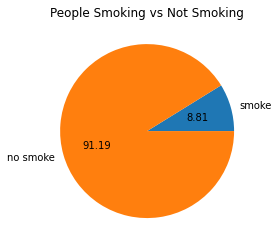

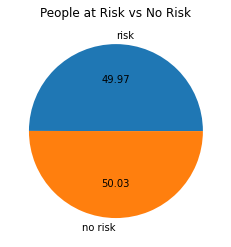

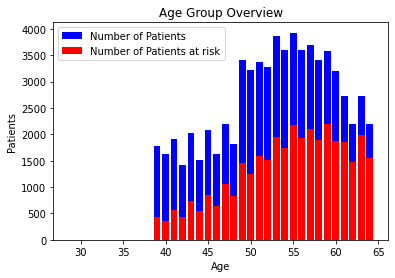

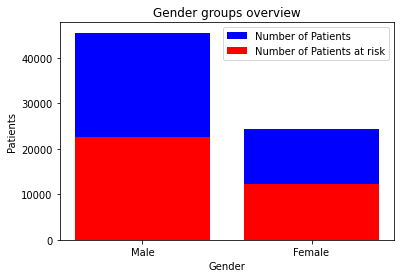

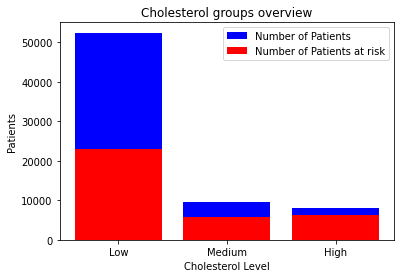

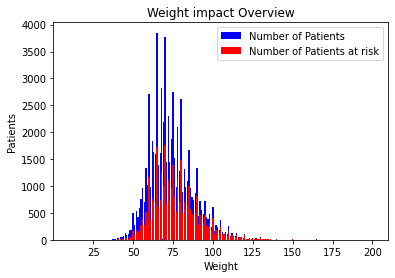

In [123]:
##### EXPLORATION PART

data = pd.read_csv ('cardio_train_explo.csv') # load data from csv
data.age = [math.trunc(entry/365) for entry in data.age] #convert age column from days to years
print (data)

#Smoker vs Non-Smoker
smoke = data.loc[data['smoke'] == 1].count()[0]
nosmoke = data.loc[data['smoke'] == 0].count()[0]

plt.pie([smoke,nosmoke],labels=['smoke','no smoke'], autopct = '%.2f')
plt.title('People Smoking vs Not Smoking')
plt.show()

#Number of people at risk vs number of people not at risk
risk = data.loc[data['cardio'] == 1].count()[0]
norisk = data.loc[data['cardio'] == 0].count()[0]

plt.pie([risk,norisk],labels=['risk','no risk'], autopct = '%.2f')
plt.title('People at Risk vs No Risk')
plt.show()

#What age group is at risk
uniqueage = data['age'].unique()
uniqueage.sort()
agecount = {}
ageriskcount = {}
for age in uniqueage:
    count = data.loc[data['age'] == age].count()[0]
    riskcount = data.loc[(data['cardio'] == 1) & (data['age']== age)].count()[0]
    agecount[age] = count
    ageriskcount[age] = riskcount

counts = agecount.values()
riskcounts = ageriskcount.values()

plt.bar(uniqueage, counts, color='b', label='Number of Patients')
plt.bar(uniqueage, riskcounts, color='r', label='Number of Patients at risk')
plt.legend()
plt.xlabel('Age')
plt.ylabel('Patients')
plt.title('Age Group Overview')
plt.show()

#Male vs female
maletotal = data.loc[data['gender'] == 1].count()[0]
malerisk = data.loc[(data['cardio'] == 1) & (data['gender']== 1)].count()[0]
femaletotal = data.loc[data['gender'] == 2].count()[0]
femalerisk = data.loc[(data['cardio'] == 1) & (data['gender']== 2)].count()[0]

plt.bar(['Male', 'Female'], [maletotal,femaletotal], color='b', label='Number of Patients')
plt.bar(['Male', 'Female'], [malerisk,femalerisk], color='r', label='Number of Patients at risk')
plt.legend()
plt.xlabel('Gender')
plt.ylabel('Patients')
plt.title('Gender groups overview')
plt.show()

#Does high cholesterol mean high risk?


lowcount = data.loc[data['cholesterol'] == 1].count()[0]
medcount = data.loc[data['cholesterol'] == 2].count()[0]
highcount = data.loc[data['cholesterol'] == 3].count()[0]

lowcountrisk = data.loc[(data['cardio'] == 1) & (data['cholesterol']== 1)].count()[0]
medcountrisk = data.loc[(data['cardio'] == 1) & (data['cholesterol']== 2)].count()[0]
highcountrisk = data.loc[(data['cardio'] == 1) & (data['cholesterol']== 3)].count()[0]

plt.bar(['Low', 'Medium', 'High'], [lowcount,medcount,highcount], color='b', label='Number of Patients')
plt.bar(['Low', 'Medium', 'High'], [lowcountrisk,medcountrisk,highcountrisk], color='r', label='Number of Patients at risk')
plt.legend()
plt.xlabel('Cholesterol Level')
plt.ylabel('Patients')
plt.title('Cholesterol groups overview')
plt.show()

#Does Weight increase the risk?
uniqueweight = data['weight'].unique()
uniqueweight.sort()
weightcount = {}
weightriskcount = {}
for weight in uniqueweight:
    count = data.loc[data['weight'] == weight].count()[0]
    riskcount = data.loc[(data['cardio'] == 1) & (data['weight']== weight)].count()[0]
    weightcount[weight] = count
    weightriskcount[weight] = riskcount

counts = weightcount.values()
riskcounts = weightriskcount.values()

plt.bar(uniqueweight, counts, color='b', label='Number of Patients')
plt.bar(uniqueweight, riskcounts, color='r', label='Number of Patients at risk')
plt.legend()
plt.xlabel('Weight')
plt.ylabel('Patients')
plt.title('Weight impact Overview')
plt.show()

    